# MODELOS DE REGRESIÓN LINEAL
##Modelos con datos simulados
* y = a + bx
(a es alfa y b es beta)

Generamos dos distribuciones de números.

* X : 100 valores distribuidos según una N (1,5, 2,5)

(una normal de media 1,5 y desviacióon standard 2,5)

* Ye = 5 + 1.9 * x + e

(donde: Ye = y estimada)

(suponemos ordenada en el origen 5 y una pendiente de 1.9)

* Añadimos una componente de error (e) que estará distribuida según una Normal (0, 0,8) de media 0 y desviación típica 0.8)



In [37]:
import pandas as pd
import numpy as np

In [38]:
# X : 100 valores distribuidos según una N (1,5, 2,5):

x = 1.5 + 2.5 * np.random.randn(100)

In [39]:
# errores o residuos:

res = 0 + 0.8 * np.random.randn(100)

In [40]:
# la y de la predicción del modelo exacto:

y_pred = 5 + 1.9 * x

In [41]:
# la y actual: (lo que observamos, los datos de los que disponemos)

y_act = 5 + 1.9 * x + res

In [42]:
# paso a lista todo para meterlo en un dataframe:

x_list=x.tolist()
y_pred_list = y_pred.tolist()
y_act_list=y_act.tolist()

In [43]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [44]:
data.head()

,x,y_actual,y_prediccion
0,1.031940,8.032537,6.960686
1,3.401954,12.324016,11.463713
2,0.855413,7.418361,6.625284
3,1.683763,8.497970,8.199150
4,2.337681,9.058865,9.441593


In [45]:
# ahora vamos a hacer un plot del valor actual (el que realmente somos capaces de medir) 
# y la prediccion del mismo en frente de la varible de entrada que era la x para poder 
# comparar el valor actual con la prediccion del modelo y ver si existe o no mucha diferencia. 
# Esto nos permitirá responder cómo de precisa es la ecuación que estamos usando para predecir 
# con respecto a los valores que ya tenemos

In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
# (**) representamos una línea recta horizontal con la media 
# (hacemos el bucle for para que nos represente un punto para cada x)

y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual (rojo) vs Predicción (azul)')

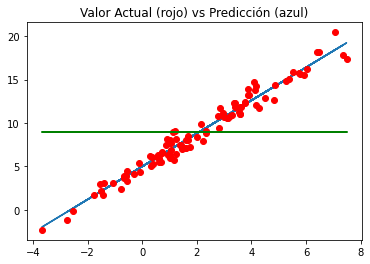

In [49]:
plt.plot(x,y_pred)
plt.plot(x, y_act,"ro")
# añado (**)
plt.plot(x,y_mean, "g")
plt.title("Valor Actual (rojo) vs Predicción (azul)")

In [50]:
# observamos que los puntos rojos están bastante cerca de la predicción. 
# no existe ningún problema con la generación de los números.

In [51]:
# Vamos a añadir un par de cosas adicionales para representar el promedio de los 
# valores actuales para tener una mejor perspectiva de comparación

In [52]:
# (ver ** justo debajo del %matplotlib inline vamos a representar una línea horizontal para representar dónde está la media de los valores

In [53]:
# ¿por qué hemos pintado el promedio?

In [54]:
# En el caso de que no tengamos un modelo predictor muy bueno, 
# lo mejor que podemos hacer es elegir el promedio de los valores observados y 
# decir si ese promedio es una buena forma de predecir los valores o no.
# Otro punto a tener en cuenta a la hora de juzgar la eficacia del modelo, 
# es que si nosotros tenemos datos que contienen dos variables (entrada y salida) 
# el programa estadistico va a generar algunos valores de alfa y beta. 
# ¿como podemos entender esos valores nosotros? para verlo, vamos a ver los puntos que 
# se separan más de la línea

In [55]:
# el dato observado forma parte del dataset y no le podemos cambiar la naturaleza, 
# simplemente es lo que uno ha observado.
# este dato observado (y_actual) no es el valor de la predicción. 
# Desde el valor observado hasta el modelo hay un desplazamiento (variación)
# este desplazamiento es la desviación con respecto al modelo, y el modelo no puede explicar 
# porqué se separa tanto (o tan poco) del valor actual.
# El SSD (diferencia con respecto al modelo)
# La línea verde es la distancia desde el dato observado hasta la media (distancia con respecto al promedio: la suma de los cuadrados totales)
# En un mundo perfecto la linea azul desaparecería y la SST sería igual al SSR
# El azul debería distribuirse como una normal

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R^2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [56]:
# cuanto más cerca esté R^2 a 1, mejor
# pero R^2 no es el único indicador que nos dice si la predicción es buena, hay otros indicadores

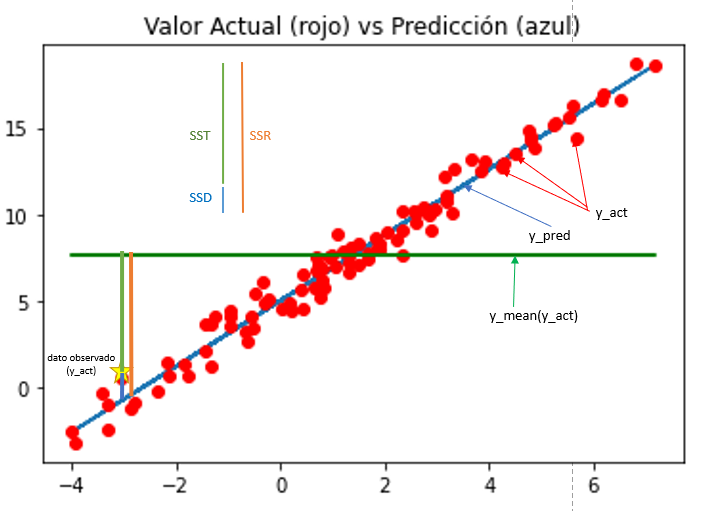

In [57]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"] - y_m)**2
data["SSD"]=(data["y_prediccion"] - data["y_actual"])**2
data["SST"]=(data["y_actual"] - y_m)**2

In [58]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.031940,8.032537,6.960686,3.993288,1.148864,0.858348
1,3.401954,12.324016,11.463713,6.273548,0.740122,11.323284
2,0.855413,7.418361,6.625284,5.446265,0.628971,2.373592
3,1.683763,8.497970,8.199150,0.577384,0.089293,0.212556
4,2.337681,9.058865,9.441593,0.232889,0.146481,0.009972


In [59]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [60]:
SSR

1994.7741832506836

In [61]:
SSD

65.06424859141103

In [62]:
SST

2083.2789927823133

In [63]:
SSR + SSD

2059.8384318420945

In [64]:
# R^2
R2 = SSR / SST

In [65]:
R2

0.9575165833101271

(array([ 2.,  2.,  2.,  1.,  1.,  7.,  8.,  5.,  4.,  6., 11., 10., 14.,
         6.,  7.,  6.,  3.,  3.,  1.,  1.]),
 array([-2.04849494, -1.85444274, -1.66039055, -1.46633835, -1.27228615,
        -1.07823396, -0.88418176, -0.69012957, -0.49607737, -0.30202517,
        -0.10797298,  0.08607922,  0.28013141,  0.47418361,  0.66823581,
         0.862288  ,  1.0563402 ,  1.25039239,  1.44444459,  1.63849679,
         1.83254898]),
 <BarContainer object of 20 artists>)

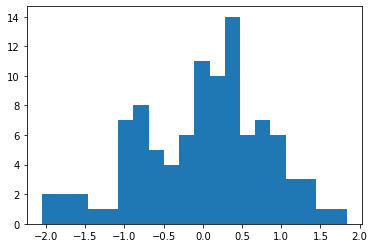

In [66]:
# Vamos a comprobar que la suma de los errores de la diferencia debería ser normal:

plt.hist((data["y_prediccion"] - data["y_actual"]),bins=20)

In [67]:
## conclusión:
# solo hay 63 puntos (SSD) de los 1850 totales (SST) que no explica el modelo
# la parte que no explica el modelo es solo un 1-0.965 (1-R^2), es decir, un 3.5%
# se distribuyen como una normal
# concluimos que la regresión es CORRECTA

In [68]:
# Por ahora hemos comprobado cómo se comporta la regresion ficticia que nos hemos inventado.
# vamos a utilizar la x como VARIABLE PREDICTORA para predecir el VALOR ACTUAL (variable de salida)

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m) * (y_i-y_m)) / sum((xi-x_m)^2)
* a = y_m - b * x_m

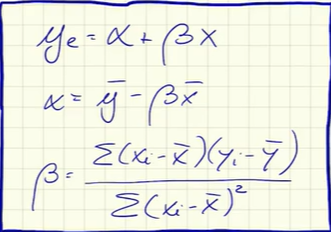


In [69]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(2.08599140822036, 8.959007345829177)

In [70]:
data["beta_n"] = (data["x"]-x_mean) * (data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [71]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [72]:
alfa = y_mean - beta * x_mean

In [73]:
alfa, beta

(4.972333012018542, 1.9111652704321638)

In [74]:
# cuadra porque nosotros habíamos dicho que la y_pred = 5 + 1.9 * x


In [75]:
# nuestro modelo lineal obtenido por regresión es:
y = 4.9588960303414105 + 1.900616882079253 * x

In [76]:
# y qué creemos, que la predicción será mejor con el model original o con el que acabamos de crear

In [77]:
data["y_model"]=alfa + beta*data["x"]

In [78]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.031940,8.032537,6.960686,3.993288,1.148864,0.858348,0.976548,1.111024,6.944541
1,3.401954,12.324016,11.463713,6.273548,0.740122,11.323284,4.428226,1.731758,11.474029
2,0.855413,7.418361,6.625284,5.446265,0.628971,2.373592,1.895887,1.514324,6.607168
3,1.683763,8.497970,8.199150,0.577384,0.089293,0.212556,0.185442,0.161788,8.190282
4,2.337681,9.058865,9.441593,0.232889,0.146481,0.009972,0.025133,0.063348,9.440027


In [79]:
# calculo el R^2

In [80]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [81]:
SSR, SSD, SST

(2018.2855444092586, 64.99344837305864, 2083.2789927823133)

In [82]:
SSR + SSD

2083.2789927823173

In [83]:
R2 = SSR / SST
R2

0.9688023310376432

In [84]:
# comprobamos que la R^2 ha mejorado un poquito.
# vamos a representarlo

Text(0.5, 1.0, 'Valor Actual (rojo) vs Predicción (azul)')

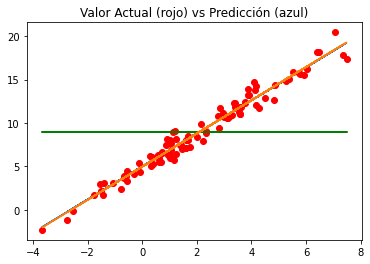

In [85]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act,"ro")
# añado (**)
plt.plot(x,y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual (rojo) vs Predicción (azul)")

In [86]:
# apenas se aprecia, pero hay una linea azul y otra naranja

In [87]:
# dijimos que hay diferentes estadísticos para saber si un modelo es bueno o no.
# por ahora hemos visto el R2

## Error estándar de los residuos (RSE)

In [88]:
RSE = np.sqrt(SSD/(len(data)-2))

In [89]:
# cuanto menor sea mejor.
RSE

0.8143699729154511

In [ ]:
# podemos comparar este valor con el promedio de los valores actuales:

In [90]:
np.mean(data["y_actual"])

8.959007345829177

In [91]:
RSE / np.mean(data["y_actual"])

0.09089957642400831

In [ ]:
# esto de arriba nos da el % de error (en este caso es bajo)